In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df_train = pd.read_csv("drive/MyDrive/train.csv")
df_train.shape

(1503424, 18)

In [4]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   item_id               1503424 non-null  object 
 1   user_id               1503424 non-null  object 
 2   region                1503424 non-null  object 
 3   city                  1503424 non-null  object 
 4   parent_category_name  1503424 non-null  object 
 5   category_name         1503424 non-null  object 
 6   param_1               1441848 non-null  object 
 7   param_2               848882 non-null   object 
 8   param_3               640859 non-null   object 
 9   title                 1503424 non-null  object 
 10  description           1387148 non-null  object 
 11  price                 1418062 non-null  float64
 12  item_seq_number       1503424 non-null  int64  
 13  activation_date       1503424 non-null  object 
 14  user_type             1503424 non-

In [6]:
is_nan = df_train.isna().sum() / len(df_train) * 100
print("NaN values in train Dataset")
print(is_nan[is_nan > 0].sort_values(ascending=False))

NaN values in train Dataset
param_3        57.373369
param_2        43.536753
description     7.734079
image           7.488772
image_top_1     7.488772
price           5.677839
param_1         4.095718
dtype: float64


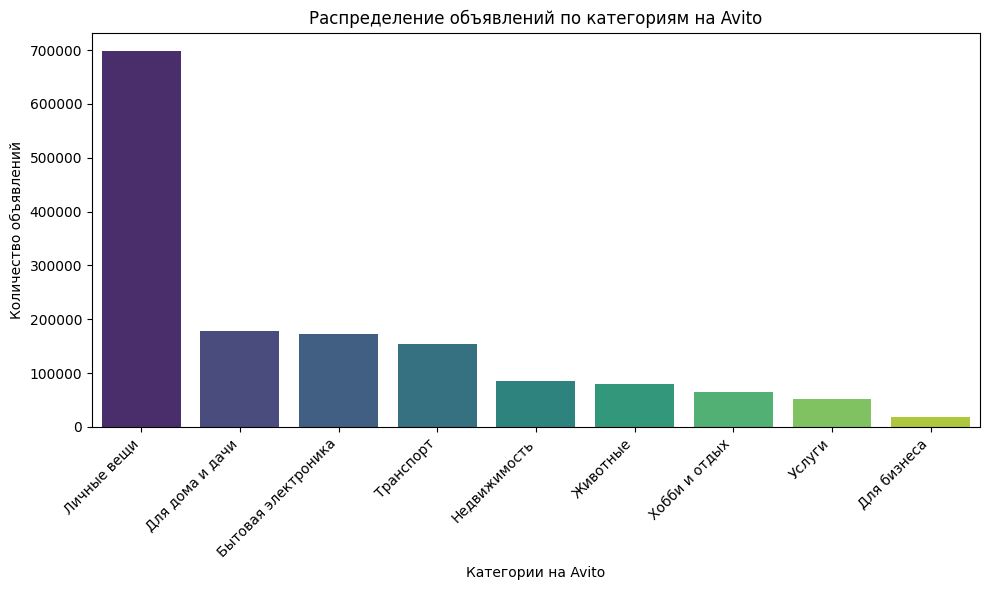

In [10]:

categories = df_train['parent_category_name'].unique()
ad_counts = df_train['parent_category_name'].value_counts().values

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=ad_counts, palette='viridis')
plt.xlabel('Категории на Avito')
plt.ylabel('Количество объявлений')
plt.title('Распределение объявлений по категориям на Avito')
plt.xticks(rotation=45, ha='right')  # Поворот названий категорий для лучшей читаемости
plt.tight_layout()


plt.show()

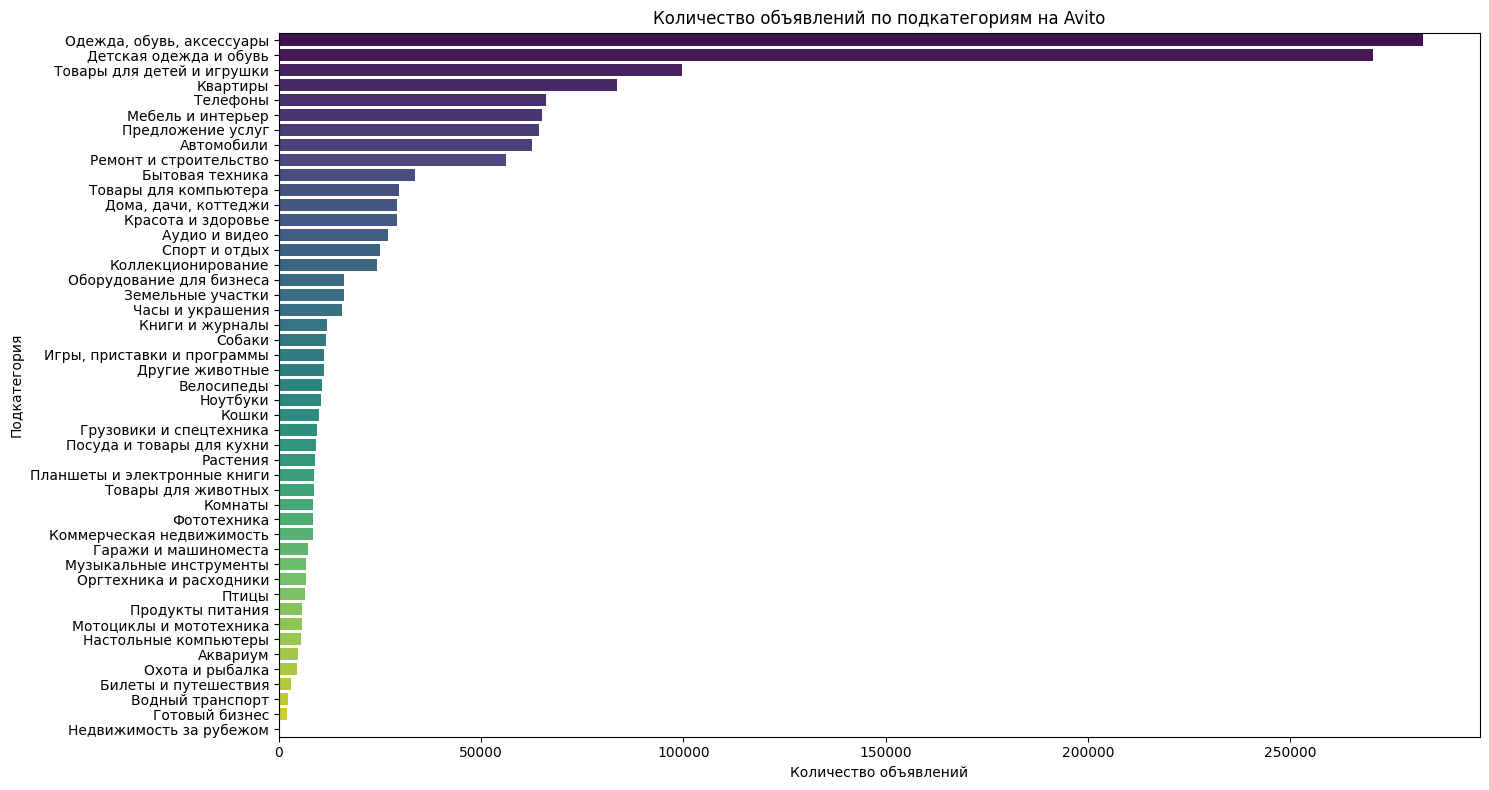

In [11]:

plt.figure(figsize=(15, 8))

# Подсчет числа объявлений для каждой подкатегории
category_counts = df_train['category_name'].value_counts()

# Построение вертикальной столбчатой диаграммы
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Количество объявлений по подкатегориям на Avito')
plt.xlabel('Количество объявлений')
plt.ylabel('Подкатегория')
plt.tight_layout()

plt.show()

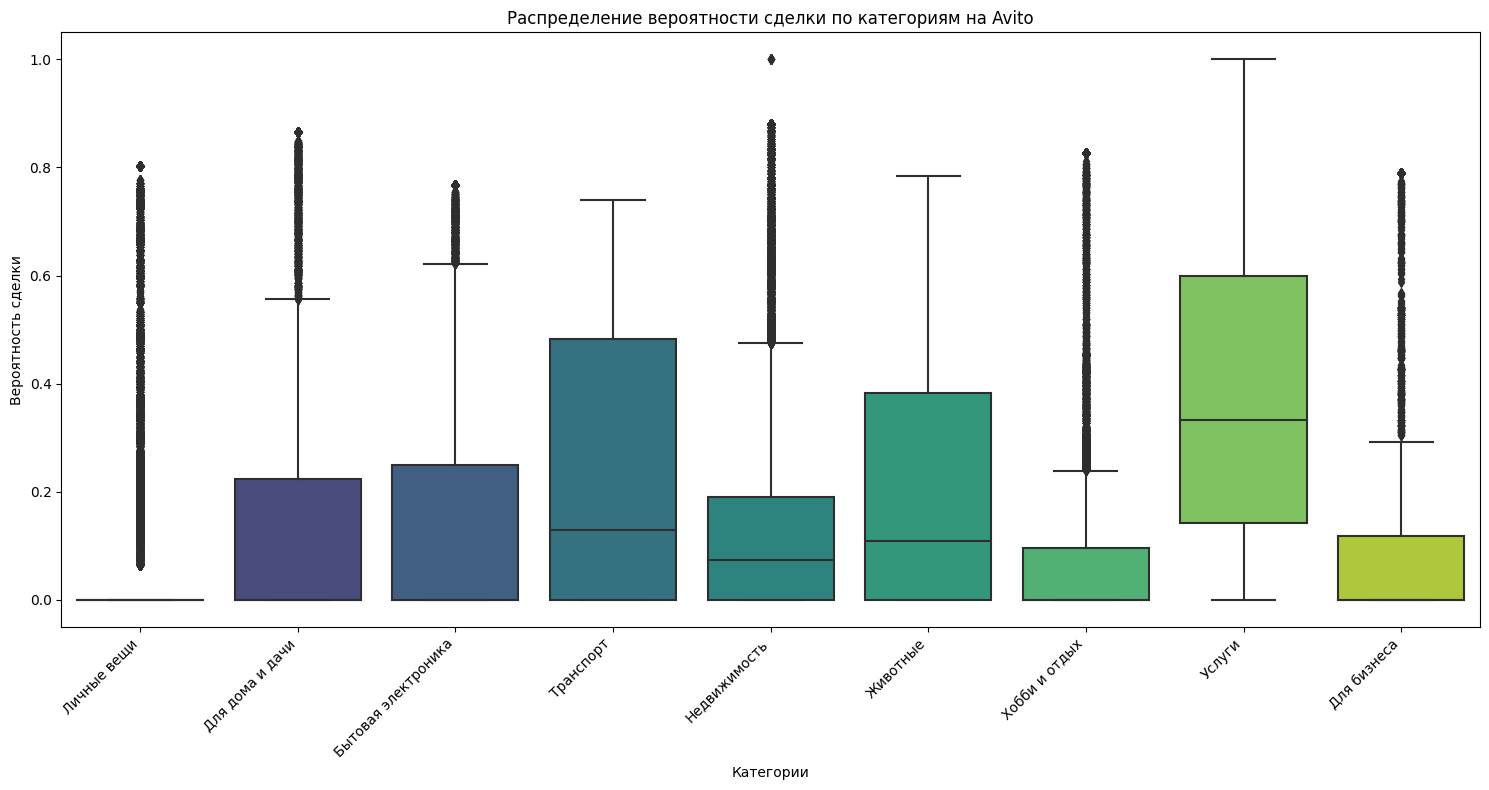

In [14]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='parent_category_name', y='deal_probability', data=df_train, palette='viridis')
plt.title('Распределение вероятности сделки по категориям на Avito')
plt.xlabel('Категории')
plt.ylabel('Вероятность сделки')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


<ipython-input-16-401ef8d005ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_with_price['log_price'] = np.log1p(df_train_with_price['price'])


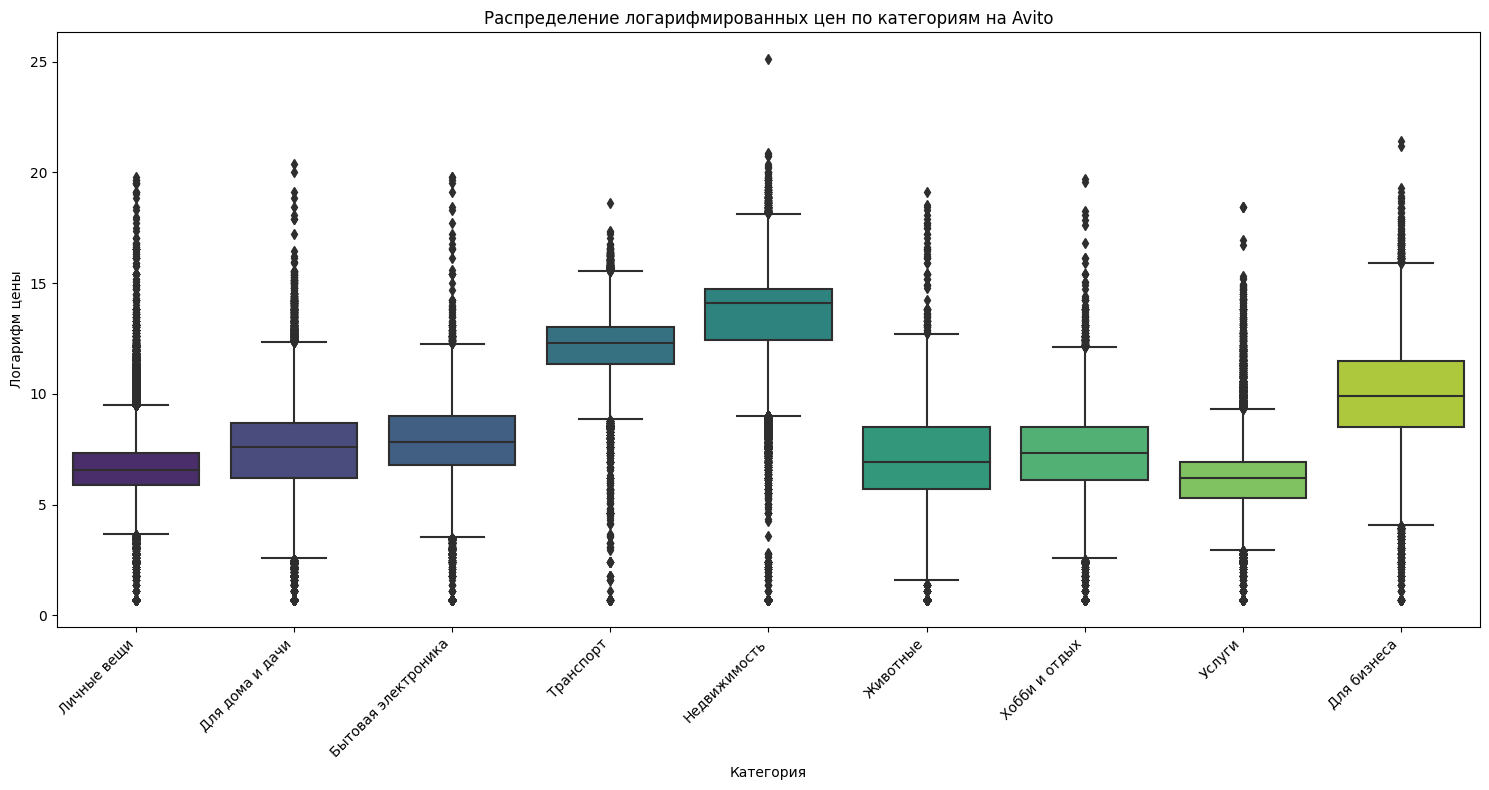

In [16]:
plt.figure(figsize=(15, 8))

# Учитываем только объявления с ненулевой ценой
df_train_with_price = df_train[df_train['price'] > 0]

# Прологарифмируем цены
df_train_with_price['log_price'] = np.log1p(df_train_with_price['price'])

# Построение ящика с усами (boxplot) для распределения логарифмированных цен по категориям
sns.boxplot(x='parent_category_name', y='log_price', data=df_train_with_price, palette='viridis')
plt.title('Распределение логарифмированных цен по категориям на Avito')
plt.xlabel('Категория')
plt.ylabel('Логарифм цены')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


Text(0.5, 1.0, 'Распределение объявлений по типам пользователей на Avito')

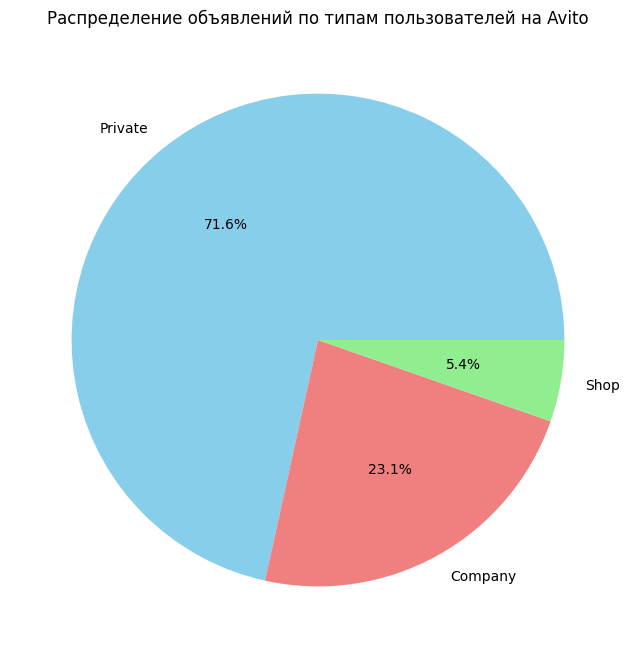

In [17]:
user_type_counts = df_train['user_type'].value_counts()

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Распределение объявлений по типам пользователей на Avito')


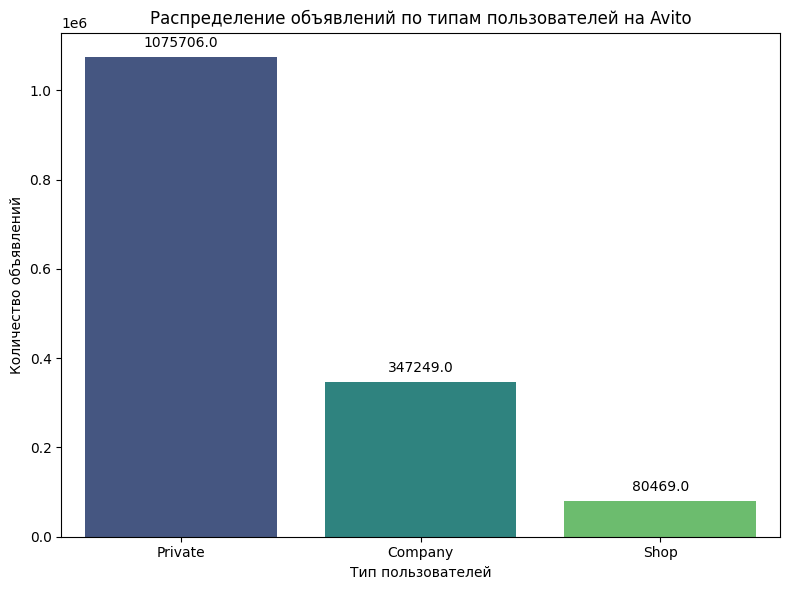

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='user_type',  data=df_train, palette='viridis')
plt.xlabel('Тип пользователей')
plt.ylabel('Количество объявлений')
plt.title('Распределение объявлений по типам пользователей на Avito')
plt.tight_layout()

# Добавление значения над каждым столбцом
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')


Text(0.5, 1.0, 'Распределение вероятности сделки по категориям и типам пользователей на Avito')

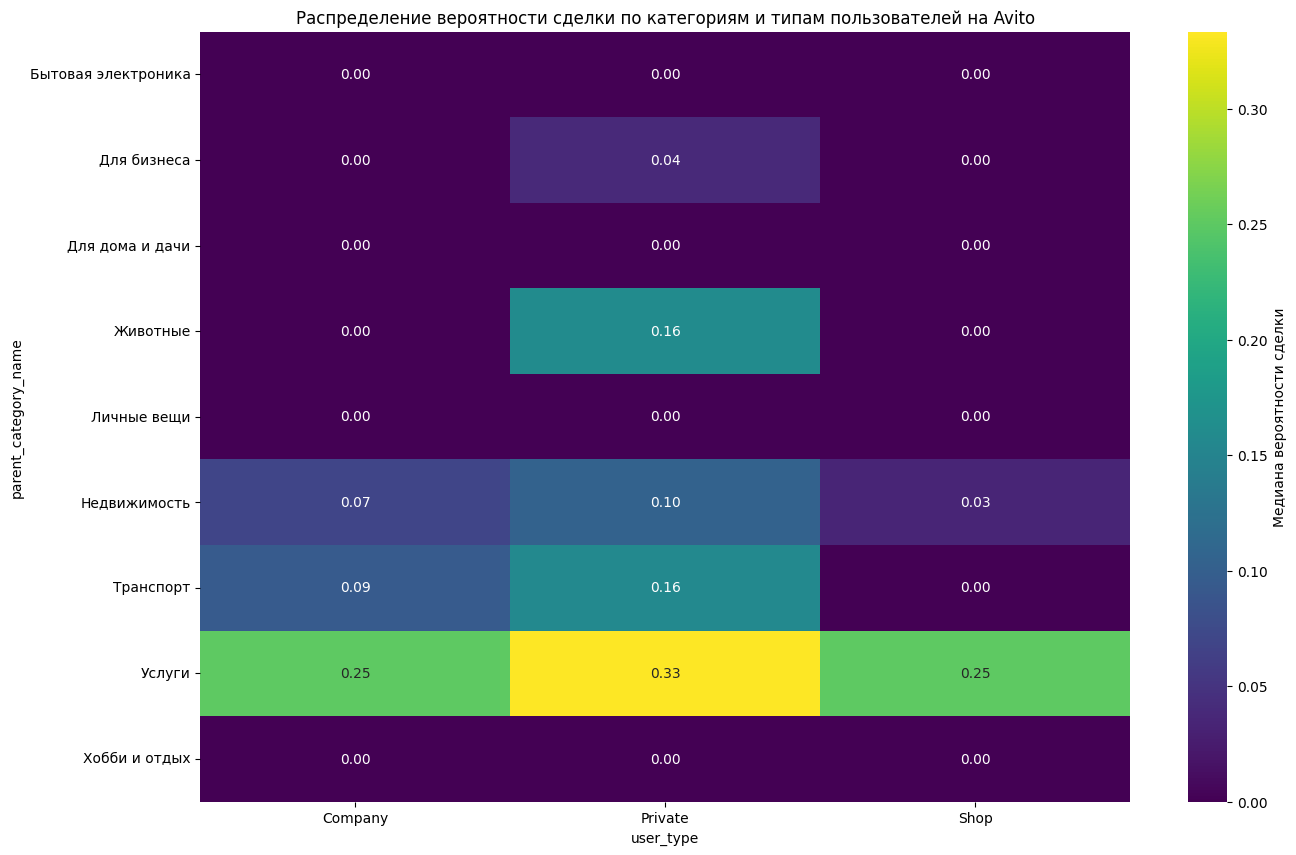

In [19]:
plt.figure(figsize=(15, 10))

# Создание тепловой карты
heatmap_data = df_train.pivot_table(index='parent_category_name', columns='user_type', values='deal_probability', aggfunc='median')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Медиана вероятности сделки'})
plt.title('Распределение вероятности сделки по категориям и типам пользователей на Avito')


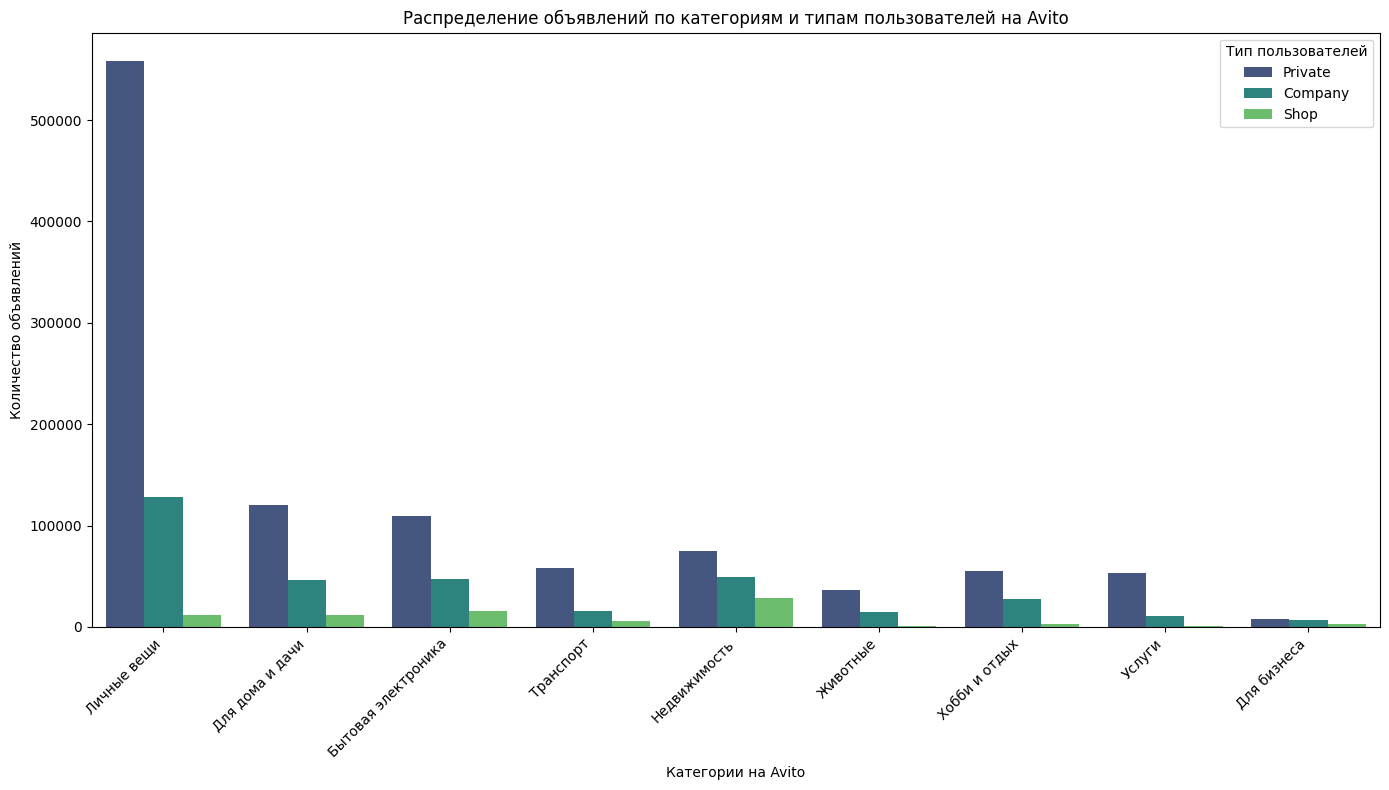

In [20]:
plt.figure(figsize=(14, 8))
sns.countplot(x='parent_category_name', hue='user_type', data=df_train, palette='viridis')
plt.xlabel('Категории на Avito')
plt.ylabel('Количество объявлений')
plt.title('Распределение объявлений по категориям и типам пользователей на Avito')
plt.legend(title='Тип пользователей')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

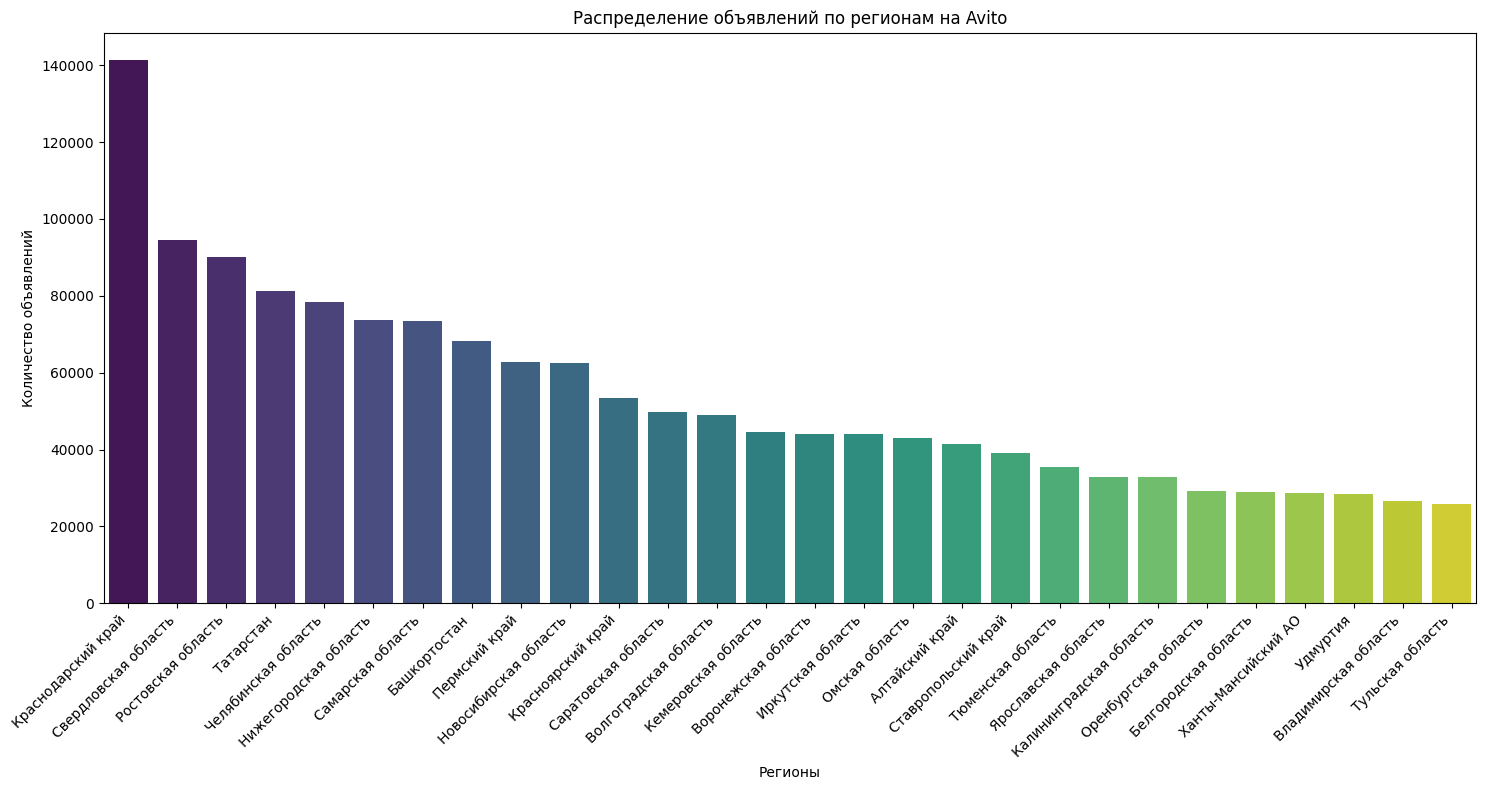

In [21]:
plt.figure(figsize=(15, 8))
sns.countplot(x='region', data=df_train, palette='viridis', order=df_train['region'].value_counts().index)
plt.title('Распределение объявлений по регионам на Avito')
plt.xlabel('Регионы')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

['Tuesday' 'Sunday' 'Monday' 'Saturday' 'Thursday' 'Friday' 'Wednesday']


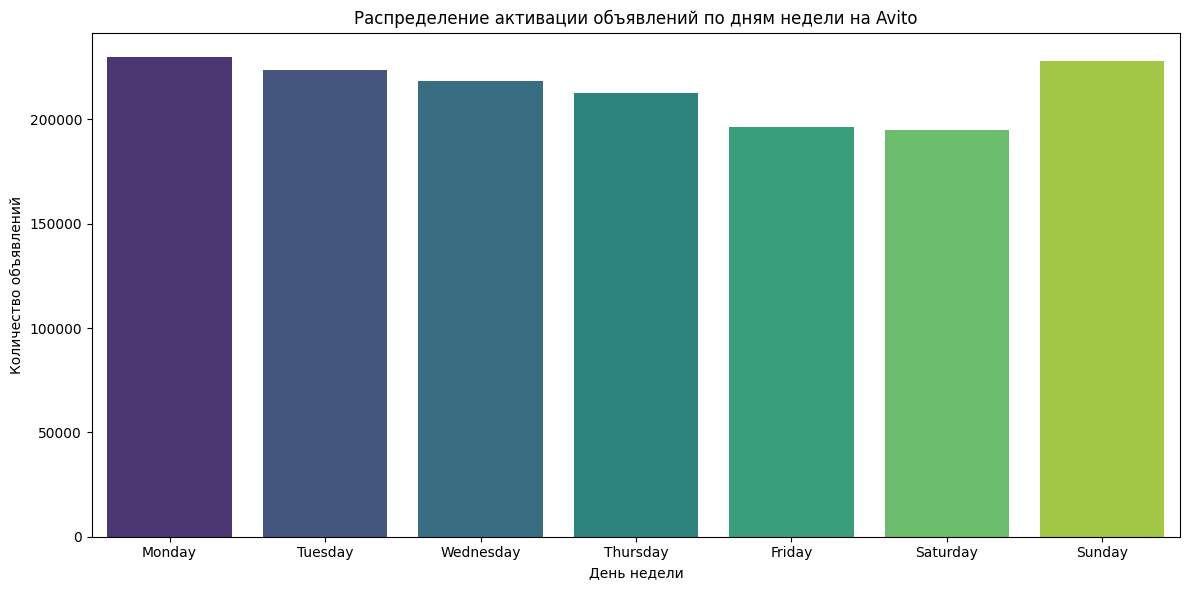

In [23]:
df_train['activation_date'] = pd.to_datetime(df_train['activation_date'])

# Извлечение информации о дне недели
df_train['day_of_week'] = df_train['activation_date'].dt.day_name()
print(df_train['day_of_week'].unique())
# Создание гистограммы
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df_train, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Распределение активации объявлений по дням недели на Avito')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.tight_layout()

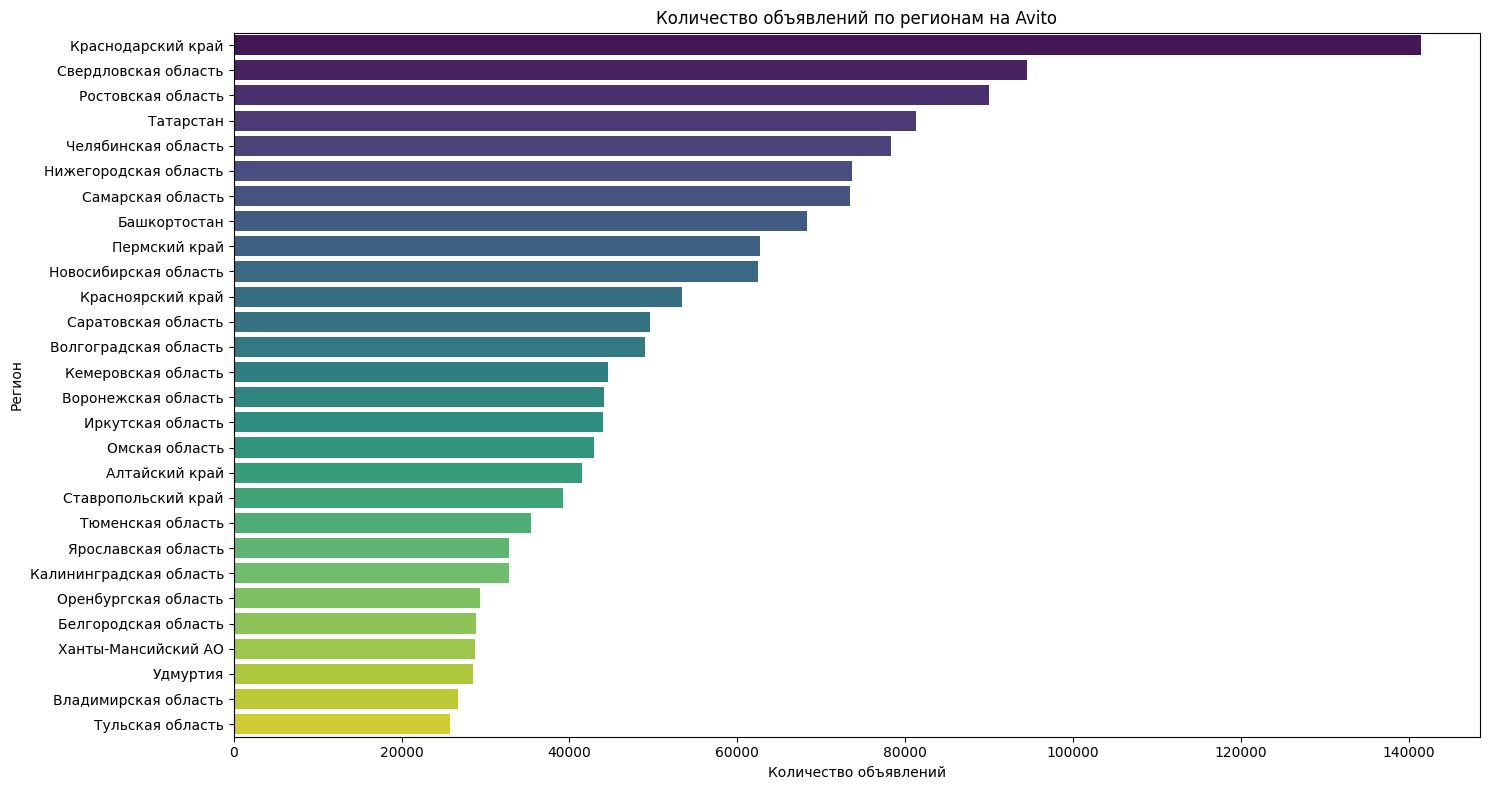

In [24]:
plt.figure(figsize=(15, 8))

# Подсчет числа объявлений для каждого региона
region_counts = df_train['region'].value_counts()

# Построение вертикальной столбчатой диаграммы
sns.barplot(x=region_counts.values, y=region_counts.index, palette='viridis')
plt.title('Количество объявлений по регионам на Avito')
plt.xlabel('Количество объявлений')
plt.ylabel('Регион')
plt.tight_layout()

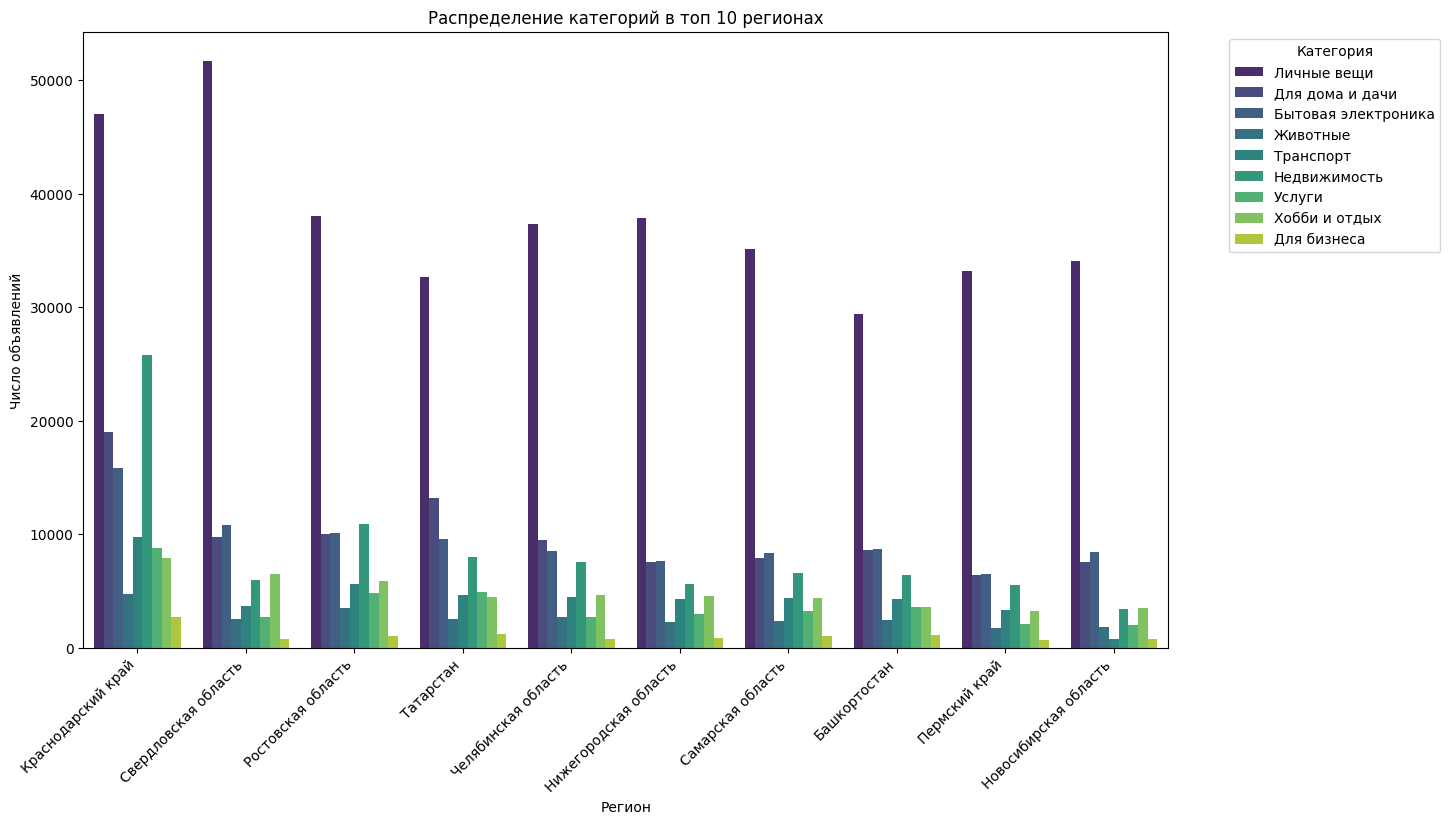

In [27]:
top_regions = df_train['region'].value_counts().nlargest(10).index

# Создадим поддатафрейм с топ регионами
df_top_regions = df_train[df_train['region'].isin(top_regions)]

# Создадим групповую столбчатую диаграмму
plt.figure(figsize=(14, 8))
sns.countplot(x='region', hue='parent_category_name', data=df_top_regions, order=top_regions, dodge=True)
plt.title('Распределение категорий в топ 10 регионах')
plt.xlabel('Регион')
plt.ylabel('Число объявлений')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

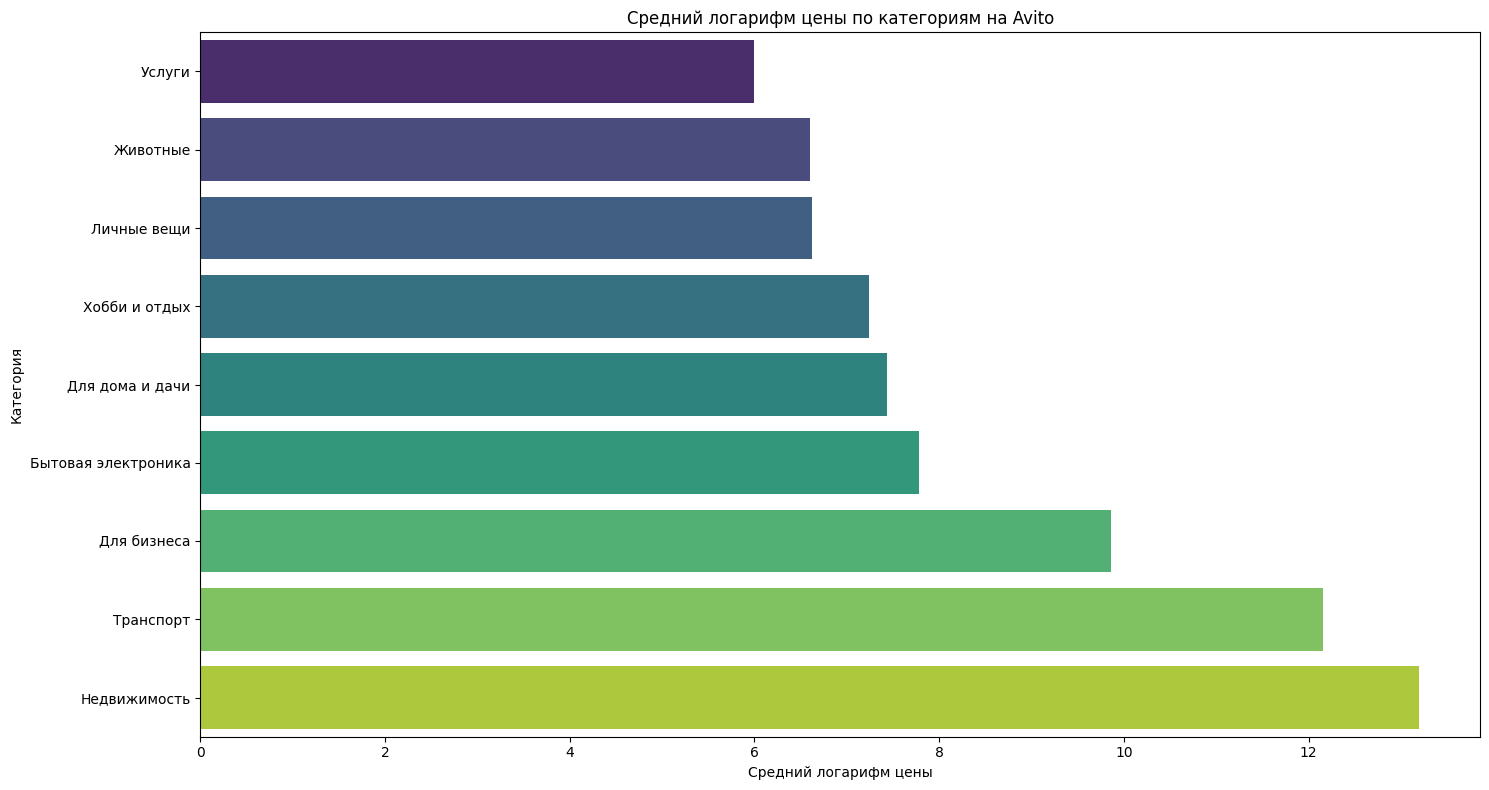

In [49]:
plt.figure(figsize=(15, 8))
df_train['price_log'] = np.log(df_train['price']+1)

# Создаем группировку по категориям и вычисляем средний логарифм цены в каждой категории
average_log_price_by_category = df_train.groupby('parent_category_name')['price_log'].mean().sort_values()

# Построение горизонтальной столбчатой диаграммы
sns.barplot(x=average_log_price_by_category.values, y=average_log_price_by_category.index, palette='viridis')
plt.title('Средний логарифм цены по категориям на Avito')
plt.xlabel('Средний логарифм цены')
plt.ylabel('Категория')
plt.tight_layout()
plt.show()

In [37]:
from nltk.corpus import stopwords

In [43]:
import nltk

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
stopWords = set(stopwords.words('russian'))

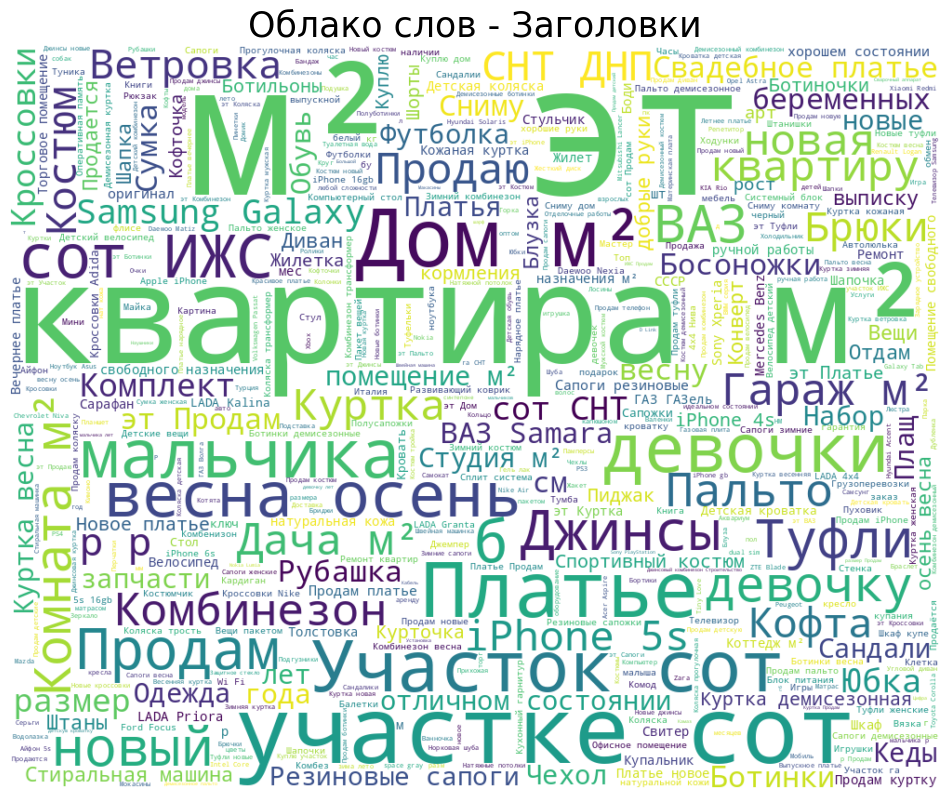

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Предположим, что у вас есть датасет df_train с колонкой 'title'
stopWords = set(stopwords.words("russian"))  # Предположим, что у вас есть список стоп-слов

wordcloud = WordCloud(background_color='white',
                      stopwords=stopWords,
                      max_words=500,
                      max_font_size=200,
                      width=1000, height=800,
                      random_state=42,
                     ).generate(" ".join(df_train['title'].astype(str)))

fig = plt.figure(figsize=(12, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Облако слов - Заголовки", fontsize=25)
plt.axis('off')
plt.show()